In [ ]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score,recall_score, confusion_matrix 

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA


df = pd.read_csv("https://raw.githubusercontent.com/sharmaroshan/Breast-Cancer-Wisconsin/master/wisconsin.csv")


In [ ]:
# select 10 atributes
df.drop(['id'], axis=1, inplace=True)
df.drop(df.columns[11:], axis=1, inplace=True)

df.columns = [s.replace('_mean', '') for s in df.columns] # for easier visualization
df

,diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,symmetry,fractal_dimension
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


#1. Visualiser les boxplots de chacun des attributs [1 à 10] - Commenter

> En regardant les boxplots ci-dessous, on observe que pour presque tous les attributs il y a une différence importante concernant les valeurs des quartiles. Effectivement, cela est spécialement remarquable dans le cas des attributs qui ont un rapport avec la dimension du sein, ce qui n'est trop apparent dans le cas de variables comme "symétrie" et "dimension fractal".




> On en conclut que très probablement les attributs servent d'indice pour le classement.  



/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

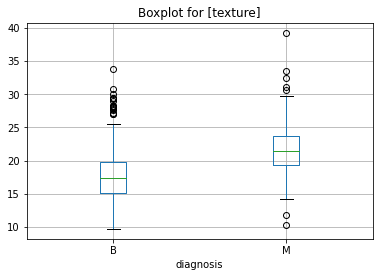

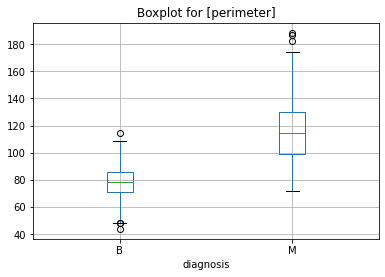

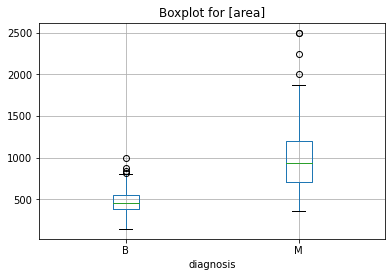

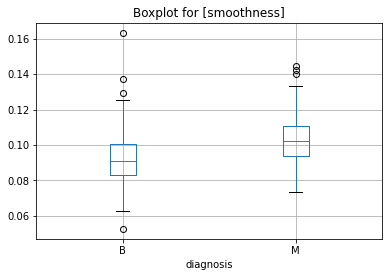

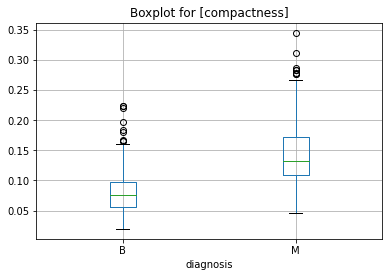

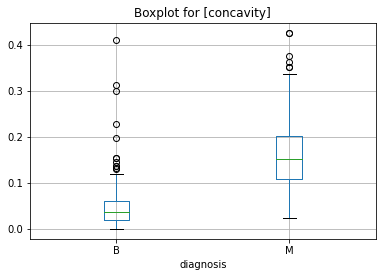

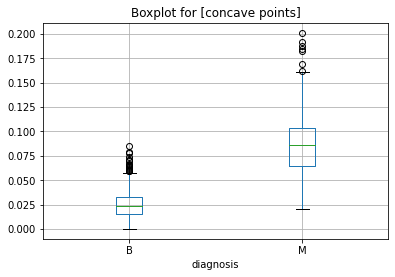

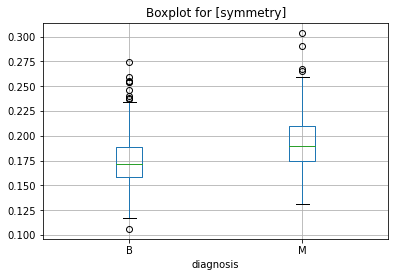

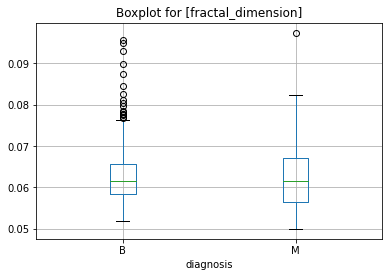

In [ ]:
#boxplot (by 'diagnosis')

for i in range(2,11):
    df.boxplot(by='diagnosis', column=df.columns[i])
    plt.title(f"Boxplot for [{df.columns[i]}]")
    plt.suptitle('')

#2. Visualiser le *correlation heatmap* 

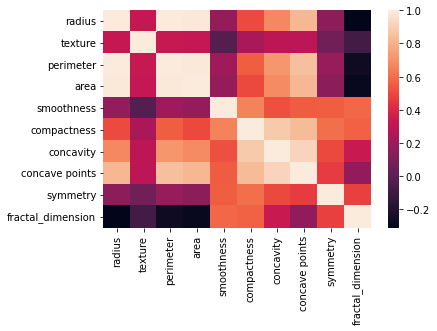

In [ ]:
#heatmap for correlation of 10 first atributes

sns.heatmap(df.corr())

#3. Commenter

> On observe une corrélation importante entre les attributs relatifs à la dimension spatiale du sein comme le rayon, l'aire et le périmètre et une baisse correction de la dimension fractale et de la symétrie avec tous les autres.  

> Le fait d'avoir observé des corrélations entre quelques variables est un indice de que leur effet peut-être redondant pour le classement, ce qui sert de motivation pour faire l'analyse en composantes principales précédemment.



In [ ]:
df.cov()

,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,symmetry,fractal_dimension
radius,12.418920,4.907582,85.447142,1224.483409,0.008454,0.094197,0.190128,0.112475,0.014273,-0.007754
texture,4.907582,18.498909,34.439759,485.993787,-0.001415,0.053767,0.103692,0.048977,0.008419,-0.002321
perimeter,85.447142,34.439759,590.440480,8435.772345,0.070836,0.714714,1.387234,0.802360,0.121922,-0.044859
area,1224.483409,485.993787,8435.772345,123843.554318,0.876178,9.264931,19.244924,11.241958,1.459596,-0.703426
smoothness,0.008454,-0.001415,0.070836,0.876178,0.000198,0.000490,0.000585,0.000302,0.000215,0.000058
compactness,0.094197,0.053767,0.714714,9.264931,0.000490,0.002789,0.003718,0.001703,0.000873,0.000211
concavity,0.190128,0.103692,1.387234,19.244924,0.000585,0.003718,0.006355,0.002850,0.001094,0.000190
concave points,0.112475,0.048977,0.802360,11.241958,0.000302,0.001703,0.002850,0.001506,0.000492,0.000046
symmetry,0.014273,0.008419,0.121922,1.459596,0.000215,0.000873,0.001094,0.000492,0.000752,0.000093
fractal_dimension,-0.007754,-0.002321,-0.044859,-0.703426,0.000058,0.000211,0.000190,0.000046,0.000093,0.000050


In [ ]:
#normalizing data (not necessary here)
#df.iloc[:,1:] = df.iloc[:,1:].apply(lambda x : (x-x.mean())/x.std(), axis=0)

#get eigenvectors and eigenvalues

values, vectors = np.linalg.eig(df.cov())

#filtering by 3 biggest eigenvalues

lista = list(zip(values, vectors.T))
lista.sort(reverse=True) 
values, vectors = list(map(list, zip(*lista)))
At = np.array(vectors[:3])

#built-in pca for testing...
'''
pca = PCA(n_components = 3)
pca.fit(df.drop(['diagnosis'], axis=1))
At = np.array(pca.components_)
print(pca.explained_variance_)
print(pca.components_)
'''

#build new dataFrame

dfn = pd.DataFrame(np.dot(At, df.iloc[:, 1:].T)).T 
dfn['diagnosis'] = df['diagnosis']  # add diagnosis
dfn = dfn[['diagnosis', 0, 1, 2]] # reorder
dfn.columns = ['diagnosis', 'e1', 'e2', 'e3'] #relabel

#4. Visualiser les boxplots de chacun des attributs après ACP

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

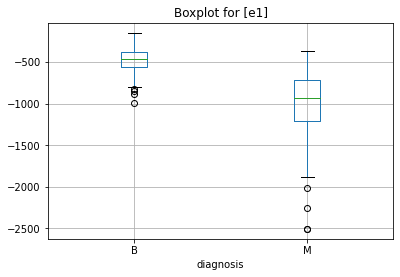

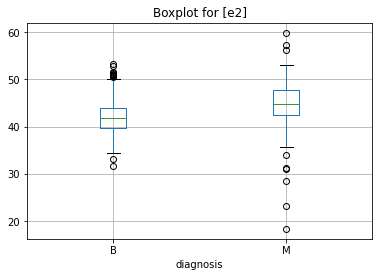

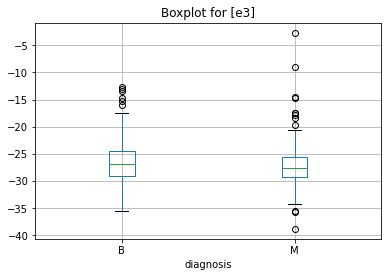

In [ ]:
#boxplot for new 3 atributes

for i in range(1,4):
    dfn.boxplot(column=dfn.columns[i], by='diagnosis')
    plt.title(f"Boxplot for [{dfn.columns[i]}]")
    plt.suptitle('')

#5. Visualiser le *correlation heatmap* du nouveau ensemble d'attributs

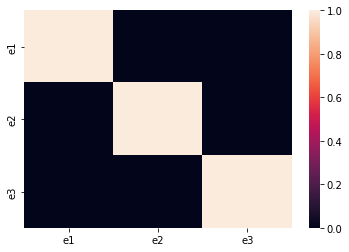

In [ ]:
# heatmap of correlations for the new 3 atributes

sns.heatmap(dfn.corr())

#6. Visualiser les données ${(y_i, \mathbf{x_i'})}_{i=1}^n$ [en utilisant des labels différents pour les deux classes]

In [ ]:
dfn

,diagnosis,e1,e2,e3
0,M,-1007.193105,39.578333,-38.819750
1,M,-1332.164050,36.804167,-25.644570
2,M,-1209.263281,43.320222,-27.410140
3,M,-390.650626,47.133621,-28.412440
4,M,-1303.366093,36.819088,-30.942566
...,...,...,...,...
564,M,-1485.448004,39.070643,-22.049324
565,M,-1267.239192,46.870720,-21.025857
566,M,-863.701665,50.830384,-23.687245
567,M,-1271.843512,53.094883,-27.045040


#7. Visualiser les classes en observant les projections sur deux composantes principales $[e_1, e_2]$, $[e_1, e_3]$, $[e_2, e_3]$

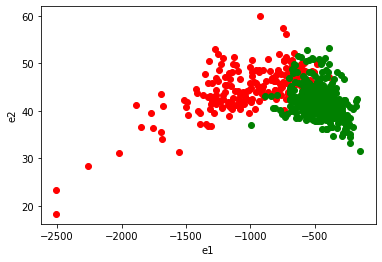

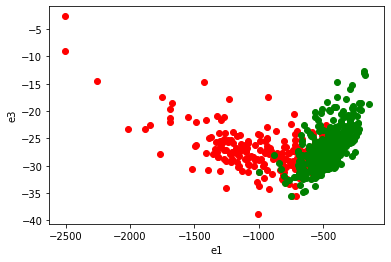

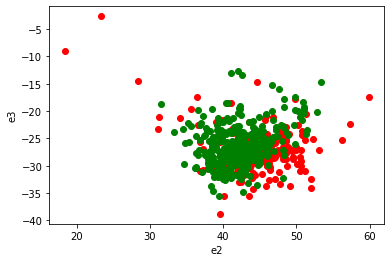

In [ ]:
#Plotting projections

dfn_M = dfn[dfn['diagnosis'] == 'M']
dfn_B = dfn[dfn['diagnosis'] == 'B']

projections = [['e1', 'e2'], ['e1', 'e3'], ['e2', 'e3']]

for i, [a,b] in enumerate(projections) :
    plt.figure(i)
    plt.scatter(x = dfn_M[a], y = dfn_M[b], color = 'r')
    plt.scatter(x = dfn_B[a], y = dfn_B[b], color = 'g')
    plt.xlabel(a)
    plt.ylabel(b)

#[8 ~ 11] Effectuer une analyse linéaire discriminante (LDA) et une analyse quadratique discriminante (QDA). Puis visualiser la frontière de décision.

In [ ]:
def plot_data(mod, X, y, y_pred, fig_index, side):
    mod_names = ['LDA', 'QDA']
    plt.figure(fig_index)
    ax = plt.subplot(1, 2, side)
    ax.title.set_text(f"{mod_names[side-1]} : [{X.columns[0]}, {X.columns[1]}]")
    plt.xlabel(X.columns[0])
    plt.ylabel(X.columns[1])

    tp = y == y_pred  # True Positive
    tp0, tp1 = tp[y == 'B'], tp[y == 'M']
    X0, X1 = X[y == 'B'], X[y == 'M']
    X0_tp, X0_fp = X0[tp0], X0[~tp0]
    X1_tp, X1_fp = X1[tp1], X1[~tp1]

    # '.'  / 'x' ---> (correct / incorrect) classification
    # class 'B': '.' and 'x' 
    plt.scatter(X0_tp.iloc[:, 0], X0_tp.iloc[:, 1], marker=".", color="g")
    plt.scatter(X0_fp.iloc[:, 0], X0_fp.iloc[:, 1], marker="x", s=20, color="#026440")  # dark green

    # class 'M': '.' and 'x' 
    plt.scatter(X1_tp.iloc[:, 0], X1_tp.iloc[:, 1], marker=".", color="r")
    plt.scatter(X1_fp.iloc[:, 0], X1_fp.iloc[:, 1], marker="x", s=20, color="#a50000")  # dark red

    # line division
    nx, ny = 200, 100
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx), np.linspace(y_min, y_max, ny))
    Z = mod.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = Z[:, 1].reshape(xx.shape)
    plt.contour(xx, yy, Z, [0.5], linewidths=2.0, colors="black")


###On effectue un LDA et un QDA pour chaque paire d'attibuts pour que ça soit plus facile de visualiser la frontière de décision. Il faudrait faire un graphique 3D sinon.

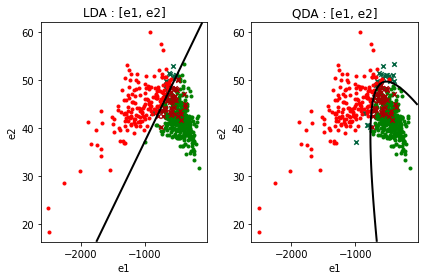

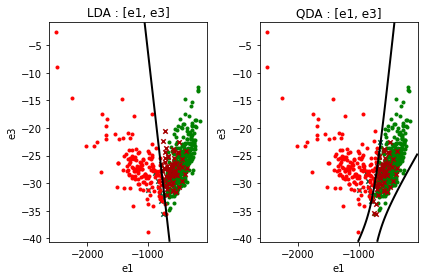

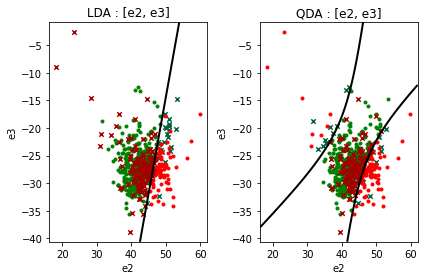

In [ ]:
# data prep
X = dfn.drop(['diagnosis'], axis=1)
y = dfn['diagnosis']

lda = LinearDiscriminantAnalysis()
qda = QuadraticDiscriminantAnalysis()

for i, atribute in enumerate(['e3', 'e2', 'e1']) :

  #LDA 
  y_pred = lda.fit(X.drop([atribute], axis=1).values, y).predict(X.drop([atribute], axis=1).values)
  plot_data(lda, X.drop([atribute], axis=1), y, y_pred, fig_index=i, side=1)
  
  #QDA
  y_pred = qda.fit(X.drop([atribute], axis=1).values, y).predict(X.drop([atribute], axis=1).values)
  plot_data(qda, X.drop([atribute], axis=1), y, y_pred, fig_index=i, side=2)
  
  plt.tight_layout()

###Pour les 2 exercices suivantes, on prend la moyenne obtenue avec la méthode de *cross validation* $(n=10)$

In [ ]:
def mean_cv(model, X, y, n):
  accuracy = np.zeros(n) 
  recall = np.zeros(n)
  tn = np.zeros(n)
  fp = np.zeros(n)
  fn = np.zeros(n)
  tp = np.zeros(n)

  skf = StratifiedKFold(n_splits=n, random_state=42, shuffle=True)
  for i, (idx_train, idx_test) in enumerate(skf.split(X, y)): 
    X_train, X_test = X.iloc[idx_train], X.iloc[idx_test]
    y_train, y_test = y[idx_train], y[idx_test]
    y_pred = model.fit(X_train, y_train).predict(X_test)
    # accuracy
    accuracy[i] = accuracy_score(y_test, y_pred)
    
    # recall
    recall[i] = recall_score(y_test, y_pred, average="binary", pos_label='M')
    
    # confusion matrix (ith --> true , jth --> predict)
    tp[i], fn[i], fp[i], tn[i] = confusion_matrix(y_test, y_pred, labels = ['M', 'B']).ravel() 

  return accuracy.mean(), recall.mean(), np.array([[tp.mean(), fn.mean()], [fp.mean(), tn.mean()]])

# accuracy, recall and confusion matrix
lda_acc, lda_recall, lda_CFM = mean_cv(lda, X, y, 10)
qda_acc, qda_recall, qda_CFM = mean_cv(qda, X, y, 10)

#12. Calculer par validation croisée la précision et le rappel des analyses discriminantes

In [ ]:
print(f"LDA :\naccuracy = {lda_acc}\nrecall= {lda_recall}\n")
print(f"QDA:\nacurracy = {qda_acc}\nrecall = {qda_recall}\n")

LDA :
accuracy = 0.8963659147869674
recall= 0.811038961038961

QDA:
acurracy = 0.9051691729323308
recall = 0.7781385281385281



#13. Construire pour les deux classifieurs la matrice de confusion

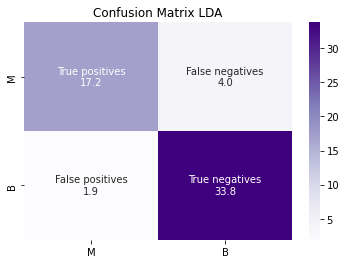

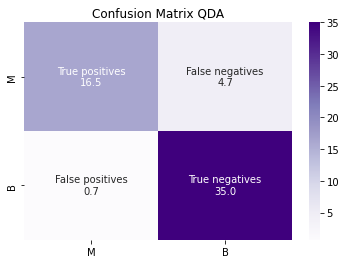

In [ ]:
#confusion matrix LDA (heatmap)
plt.figure(1)
plt.title("Confusion Matrix LDA")
labels = [f"{v1}\n{v2}" for v1, v2 in zip(['True positives', 'False negatives', 'False positives', 'True negatives'], lda_CFM.flatten())]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(lda_CFM, annot=labels, fmt='', xticklabels=['M', 'B'], yticklabels=['M', 'B'], cmap='Purples')

#confusion matrix QDA (heatmap)
plt.figure(2)
plt.title("Confusion Matrix QDA")
labels = [f"{v1}\n{v2}" for v1, v2 in zip(['True positives', 'False negatives', 'False positives', 'True negatives'], qda_CFM.flatten())]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(qda_CFM, annot=labels, fmt='', xticklabels=['M', 'B'], yticklabels=['M', 'B'], cmap='Purples')